In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [47]:

data = pd.read_csv('ABF.L.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8127,2020-02-04,2621.0,2652.00,2612.0,2644.0,2644.0,1434380.0
8128,2020-02-05,2629.0,2685.00,2623.0,2672.0,2672.0,3475209.0
8129,2020-02-06,2690.0,2709.25,2676.0,2708.0,2708.0,877389.0
8130,2020-02-07,2710.0,2712.00,2691.0,2693.0,2693.0,994720.0
8131,2020-02-10,2700.0,2718.00,2690.0,2708.0,2708.0,995303.0


In [48]:
data_training = data[:5700]
data_test = data[5700:]

In [49]:

data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [50]:

scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[3.88107437e-03, 3.86786391e-03, 3.94393567e-03, 3.90776787e-03,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.47795221e-04, 6.45590246e-04, 6.58287482e-04, 6.52250668e-04,
        0.00000000e+00],
       ...,
       [9.62430154e-01, 9.59154220e-01, 9.57193960e-01, 9.48416028e-01,
        6.51278346e-02],
       [9.45922192e-01, 9.47808170e-01, 9.48517060e-01, 9.42684476e-01,
        6.51101174e-02],
       [9.40799031e-01, 9.39865935e-01, 9.48517060e-01, 9.43257631e-01,
        6.30120591e-02]])

In [51]:
data_training[0:10]

array([[0.00388107, 0.00386786, 0.00394394, 0.00390777, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.0006478 , 0.00064559, 0.00065829, 0.00065225, 0.        ],
       [0.00129444, 0.00129004, 0.00131541, 0.00130335, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00388107, 0.00386786, 0.00394394, 0.00390777, 0.        ],
       [0.00388107, 0.00386786, 0.00394394, 0.00390777, 0.        ],
       [0.00258776, 0.00257895, 0.00262967, 0.00260556, 0.        ],
       [0.00258776, 0.00257895, 0.00262967, 0.00260556, 0.        ],
       [0.00323443, 0.00322342, 0.00328681, 0.00325667, 0.        ]])

In [52]:
X_train = []
y_train = []

In [53]:
for i in range(30, data_training.shape[0]):
    X_train.append(data_training[i-30:i])
    y_train.append(data_training[i, 0])

In [54]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [55]:

X_train.shape

(5670, 30, 5)

In [56]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [57]:

model = Sequential()
model.add(LSTM(units = 30, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(LSTM(30, activation='relu'))
model.add(Dense(1))


In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 30)            4320      
_________________________________________________________________
lstm_5 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 11,671
Trainable params: 11,671
Non-trainable params: 0
_________________________________________________________________


In [59]:

model.compile(optimizer='adam', loss = 'mean_squared_error')

In [61]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
 768/5670 [===>..........................] - ETA: 25s - loss: nan

KeyboardInterrupt: 

In [ ]:
data_test.head()

In [17]:
data_training


array([[4.30231057e-03, 4.30231057e-03, 4.37969383e-03, 4.34342257e-03,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [7.18104307e-04, 7.18104307e-04, 7.31020450e-04, 7.24966365e-04,
        0.00000000e+00],
       ...,
       [9.09132671e-01, 9.16704949e-01, 9.20345751e-01, 9.16546051e-01,
        1.16504925e-01],
       [9.05977556e-01, 9.09763694e-01, 9.15849140e-01, 9.17183104e-01,
        5.33378101e-02],
       [9.11025740e-01, 9.19860064e-01, 9.19703378e-01, 9.28013006e-01,
        6.19117989e-02]])

In [18]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
5600,2010-02-03,890.5,896.5,880.5,882.0,745.324585,1699581.0
5601,2010-02-04,882.0,892.0,882.0,890.0,752.084961,7172904.0
5602,2010-02-05,887.5,889.5,872.0,874.5,738.986633,2507888.0
5603,2010-02-08,879.0,882.5,868.0,876.5,740.676758,905113.0
5604,2010-02-09,876.5,880.0,872.0,877.0,741.099304,1428299.0


In [19]:



data_test.tail(30)

,Date,Open,High,Low,Close,Adj Close,Volume
8102,2019-12-30,2648.0,2659.000000,2604.000000,2606.0,2606.0,900134.0
8103,2019-12-31,2600.0,2608.000000,2576.000000,2598.0,2598.0,198657.0
8104,2020-01-02,2592.0,2613.000000,2574.000000,2580.0,2580.0,719185.0
8105,2020-01-03,2564.0,2610.000000,2564.000000,2593.0,2593.0,1596780.0
8106,2020-01-06,2573.0,2625.000000,2561.000000,2615.0,2615.0,878617.0
8107,2020-01-07,2624.0,2704.270020,2616.000000,2672.0,2672.0,1338980.0
8108,2020-01-08,2669.0,2693.000000,2649.449951,2662.0,2662.0,1048965.0
8109,2020-01-09,2650.0,2669.000000,2630.000000,2660.0,2660.0,1053177.0
8110,2020-01-10,2662.0,2678.000000,2614.000000,2621.0,2621.0,1279533.0
8111,2020-01-13,2629.0,2672.179932,2564.000000,2575.0,2575.0,1705386.0


In [20]:
past_30_days = data_test.tail(30)

In [21]:
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
5600,2010-02-03,890.5,896.500000,880.500000,882.0,745.324585,1699581.0
5601,2010-02-04,882.0,892.000000,882.000000,890.0,752.084961,7172904.0
5602,2010-02-05,887.5,889.500000,872.000000,874.5,738.986633,2507888.0
5603,2010-02-08,879.0,882.500000,868.000000,876.5,740.676758,905113.0
5604,2010-02-09,876.5,880.000000,872.000000,877.0,741.099304,1428299.0
5605,2010-02-10,880.5,891.500000,876.000000,890.0,752.084961,1679060.0
5606,2010-02-11,893.0,902.000000,890.000000,900.0,760.535217,1367530.0
5607,2010-02-12,904.0,908.500000,897.000000,899.5,760.112793,1274258.0
5608,2010-02-15,904.0,905.000000,898.000000,899.5,760.112793,813872.0
5609,2010-02-16,901.5,904.000000,887.500000,900.0,760.535217,1939845.0


In [22]:
df = past_30_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,2648.0,2659.0,2604.0,2606.0,900134.0
1,2600.0,2608.0,2576.0,2598.0,198657.0
2,2592.0,2613.0,2574.0,2580.0,719185.0
3,2564.0,2610.0,2564.0,2593.0,1596780.0
4,2573.0,2625.0,2561.0,2615.0,878617.0


In [23]:

inputs = scaler.transform(df)
inputs

array([[3.13538223, 3.14926474, 3.13524778, 3.11183084, 0.05576159],
       [3.07480401, 3.08490038, 3.09927489, 3.101638  , 0.01230642],
       [3.06470764, 3.09121061, 3.0967054 , 3.07870409, 0.04455214],
       ...,
       [3.18838817, 3.21268256, 3.22774949, 3.24178967, 0.05435258],
       [3.2136291 , 3.21615319, 3.24702068, 3.22267807, 0.06162101],
       [3.20100863, 3.22372547, 3.24573593, 3.24178967, 0.06165713]])

In [24]:
X_test = []
y_test = []

for i in range(30, inputs.shape[0]):
    X_test.append(inputs[i-30:i])
    y_test.append(inputs[i, 0])

In [25]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((2532, 30, 5), (2532,))

In [26]:
y_pred = model.predict(X_test)

In [27]:
scaler.scale_

array([1.26204623e-03, 1.26204623e-03, 1.28474596e-03, 1.27410609e-03,
       6.19481005e-08])

In [28]:
scale = 1/0.00058241
scale

1717.0034855170757

In [29]:
y_pred = y_pred*scale
y_test = y_test*scale

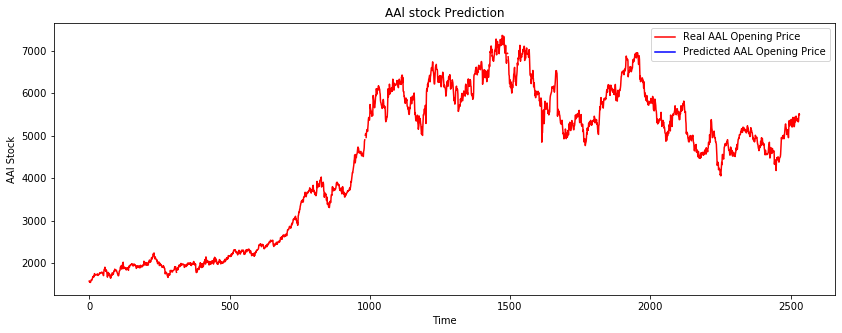

In [30]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real AAL Opening Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted AAL Opening Price')
plt.title('AAl stock Prediction')
plt.xlabel('Time')
plt.ylabel('AAl Stock')
plt.legend()
plt.show()

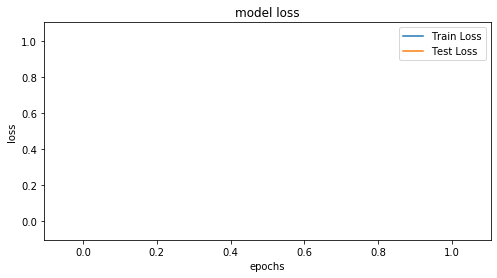

In [31]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [32]:
testScore = sqrt(mean_squared_error(y_pred,y_test))
print('Test Score: %.2f RMSE' % (testScore))

NameError: name 'sqrt' is not defined